<a href="https://colab.research.google.com/github/Ruiz0430/Audiobook-Data-Analysis/blob/main/Audiobook_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audiobook Data Analysis

Daniel Ruiz

April 8th, 2024

CAP 4773

# Section 1 Loading your dataset

1.1 [link to database](https://www.kaggle.com/datasets/rutujab99/audiobookappdata?select=Audiobooks_data.csv)

1.2 Description:

The data set contains data sourced from an audiobook application. Each customer in the database has made a purchase atleast once.The data represents two years worth of engagement. One can predict if the customer will make a purchase again from the audiobook company. The main idea is that the company shouldn't spend its advertising budget targeting individuals who are unlikely to come back. If we can focus our efforts on customers likely to convert again, we can obtain improved sales and profitability figures.


In [ ]:
#1.4
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

#1.5 Load dataset into dataframe
data = pd.read_csv("/content/drive/MyDrive/Audiobooks_data.csv")
print(data.head(n=10)) #1.6 display first 10 rows

      ID  Booklength_overall (mins)  Booklength_avg (mins)  Price_overall  \
0    994                     1620.0                   1620          19.73   
1   1143                     2160.0                   2160           5.33   
2   2059                     2160.0                   2160           5.33   
3   2882                     1620.0                   1620           5.96   
4   3342                     2160.0                   2160           5.33   
5   3416                     2160.0                   2160           4.61   
6   4949                     2160.0                   2160           5.33   
7   9011                      648.0                    648           5.33   
8   9282                     2160.0                   2160           5.33   
9  10500                     2160.0                   2160           5.33   

   Price_avg  Review  Review 10/10  Minutes_listened  Completion  \
0      19.73       1         10.00              0.99      1603.8   
1       5.33    

1.3 Describe each field:

**ID**: Books ID

**Booklength_overall**: Length of book

**Booklength_avg**: Avg mins it takes to read book

**Price_overall**: Overall price

**Price_avg**: Average price

**Review**: Book's reviews out of 10

**Minutes_listened**: Time listened to audio book

**Completion**: time of completion

**Support Request**: Trouble shooting of issues

**Last visited minus first purchase**: Time vistied minus the initial purchase

**Targets**: Target audience






In [ ]:
print(data.info()) #1.7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 14084 non-null  int64  
 1   Booklength_overall (mins)          14084 non-null  float64
 2   Booklength_avg (mins)              14084 non-null  int64  
 3   Price_overall                      14084 non-null  float64
 4   Price_avg                          14084 non-null  float64
 5   Review                             14084 non-null  int64  
 6   Review 10/10                       14084 non-null  float64
 7   Minutes_listened                   14084 non-null  float64
 8   Completion                         14084 non-null  float64
 9   Support Request                    14084 non-null  int64  
 10  Last visited minus first purchase  14084 non-null  int64  
 11  Targets                            14084 non-null  int

# Section 2: Logistic Regression

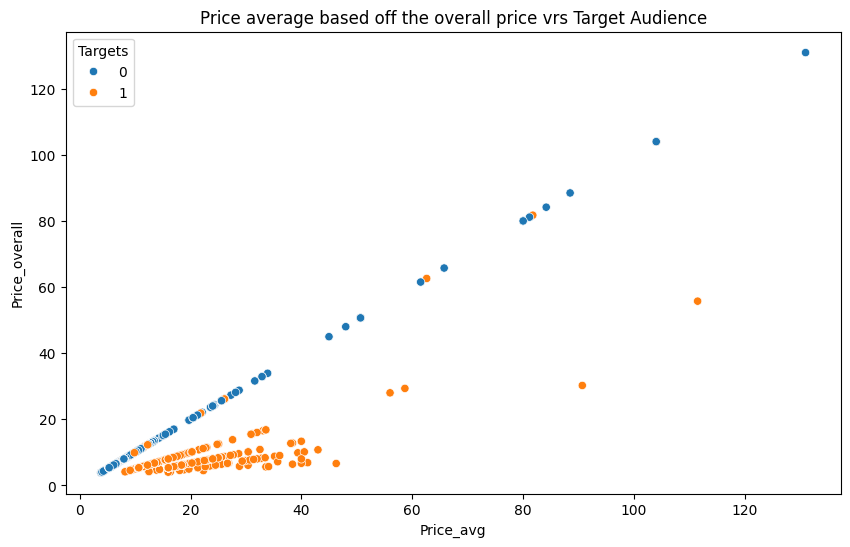

In [ ]:
#2.1
X = data.loc[:, data.columns != 'Targets']
X = sm.add_constant(X)
Y = data['Targets']

#2.2
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price_avg', y='Price_overall', hue='Targets', data=data)
plt.title('Price average based off the overall price vrs Target Audience')
plt.show()

In [ ]:
#2.3
model = sm.Logit(Y,X).fit()
#2.4
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.237351
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Targets   No. Observations:                14084
Model:                          Logit   Df Residuals:                    14072
Method:                           MLE   Df Model:                           11
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                  0.4578
Time:                        21:22:15   Log-Likelihood:                -3342.8
converged:                      False   LL-Null:                       -6165.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.1497      0.593     -3.626      0.000      -3.312      -0.

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [ ]:
#2.5
test = X.iloc[[15]].copy()
test['Price_avg'] = 14
test['Price_overall'] = 14

prediction = model.predict(test)
percentage_probability = prediction.iloc[0] * 100
binary_predictions = (prediction >= 0.5).astype(int)
class_prediction = binary_predictions.iloc[0]

print(f"Probability of user purchasing another audiobook: {percentage_probability:2f}%")
print(f"Class: {class_prediction}")
test

Probability of user purchasing another audiobook: 99.999953%
Class: 1


,const,ID,Booklength_overall (mins),Booklength_avg (mins),Price_overall,Price_avg,Review,Review 10/10,Minutes_listened,Completion,Support Request,Last visited minus first purchase
15,1.0,19996,594.0,1188,14,14,0,10.0,0.0,0.0,0,0


# Section 3: LDA

[9.26231948e-01 5.15210823e-02 7.77811821e-03 5.95120947e-03
 4.88639799e-03 2.44816851e-03 7.19386888e-04 3.26310375e-04
 1.28085631e-04 9.29259945e-06]


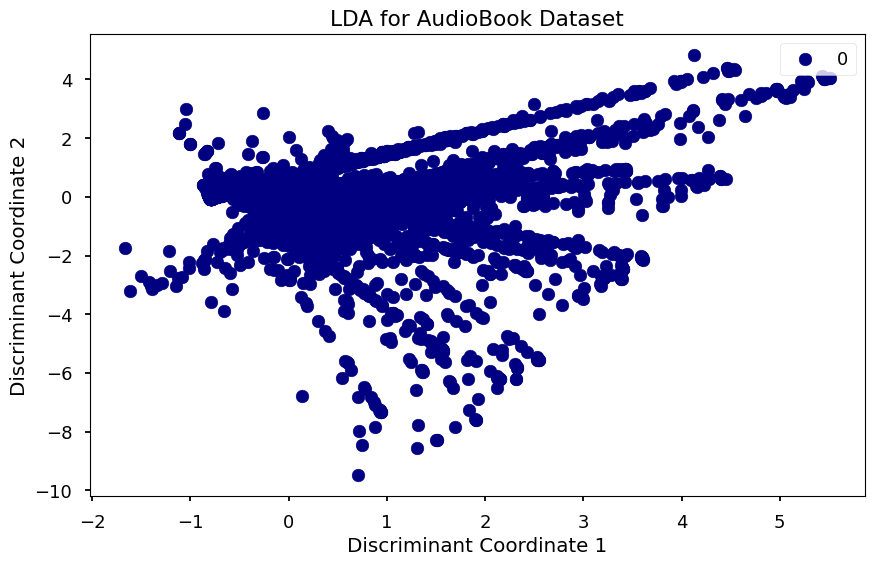

In [ ]:
X = data.loc[:, data.columns !='Last visited minus first purchase']
Y = data['Support Request']

lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)
print(lda.explained_variance_ratio_)

X_r_lda = lda.transform(X)
target_names = ['0','1','2']

with plt.style.context('seaborn-talk'):
  fig, ax=plt.subplots(figsize=[10,6])
  colors = ['navy','turquoise','darkorange']
  for color, i, target_name in zip(colors,[0,1,2],target_names):
    ax.scatter(X_r_lda[Y == i, 0], X_r_lda[Y == i, 1], alpha =1,
  label=target_name, color=color)
    ax.set_title('LDA for AudioBook Dataset')
    ax.set_xlabel('Discriminant Coordinate 1')
    ax.set_ylabel('Discriminant Coordinate 2')
    ax.legend(loc='best')
    plt.show()

# Section 4: K-fold cross-validation

In [ ]:
X = data[['Price_overall','Price_avg']]
Y = data['Targets']

lr = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
  lr.fit(X_train,Y_train)
  Y_pred = lr.predict(X_test)

  mse = mean_squared_error(Y_test,Y_pred)
  mse_scores.append(mse)

  print(f"MSE for fold {len(mse_scores)}: {mse:.4f}")

print(f"Mean MSE from 5-fold CV using Linear Regression: {np.mean(mse_scores):.4f}")
print(f"Standard deviation of MSE: {np.std(mse_scores):.4f}")

MSE for fold 1: 0.1056
MSE for fold 2: 0.1019
MSE for fold 3: 0.1177
MSE for fold 4: 0.1143
MSE for fold 5: 0.1107
Mean MSE from 5-fold CV using Linear Regression: 0.1100
Standard deviation of MSE: 0.0057


# Section 5: Linear Model Selection Statistics

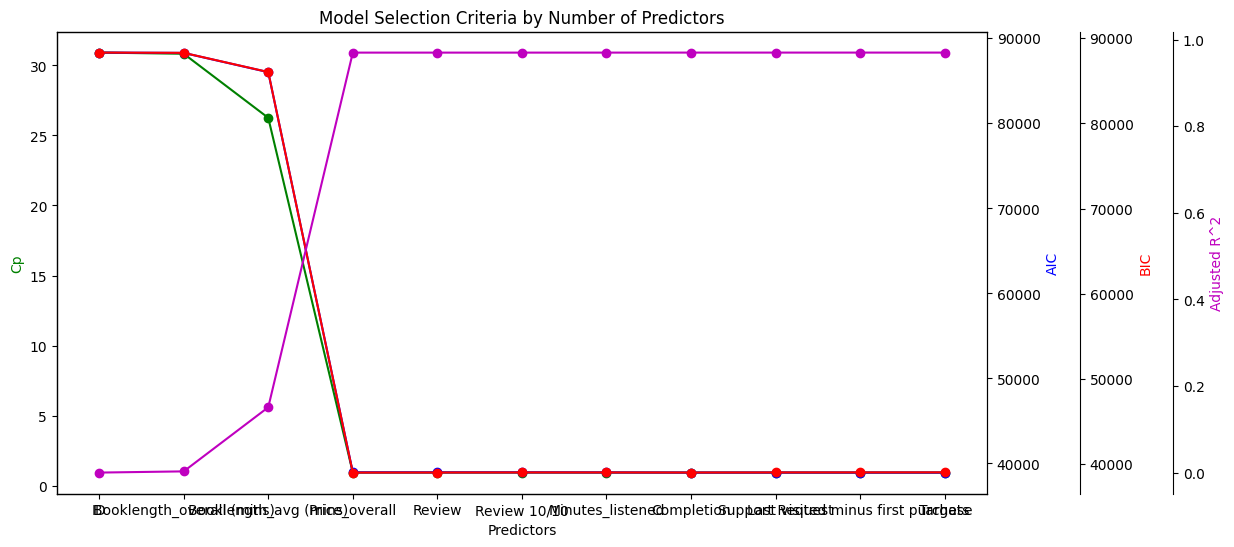

9

In [ ]:
X = data.loc[:, data.columns != "Price_avg"]
Y = data['Price_avg']

def compute_cp(model, X, Y):
  mse = np.mean((model.predict(X)-Y)**2)
  p = len(model.params) - 1
  n = len(Y)
  cp = mse + 2 * p * mse / (n-p-1)
  return cp
predictors = X.columns
cp_values, aic_values, bic_values, adjr2_values = [], [], [], []

for k in range(1, len(predictors) + 1):
  chosen_predictors = predictors[:k]
  X_subset = X[chosen_predictors]
  X_subset = sm.add_constant(X_subset)
  model = sm.OLS(Y,X_subset).fit()
  cp_values.append(compute_cp(model, X_subset, Y))
  aic_values.append(model.aic)
  bic_values.append(model.bic)
  adjr2_values.append(model.rsquared_adj)

fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

ax3.spines.right.set_position(("axes", 1.1))
ax4.spines.right.set_position(("axes", 1.2))

ax1.plot(predictors, cp_values, 'g-', label="Cp", marker='o')
ax2.plot(predictors, aic_values, 'b-', label="AIC", marker='o')
ax3.plot(predictors, bic_values, 'r-', label="BIC", marker='o')
ax4.plot(predictors, adjr2_values, 'm-', label="Adj R^2", marker='o')

ax1.set_xlabel('Predictors')
ax1.set_ylabel('Cp', color='g')
ax2.set_ylabel('AIC', color='b')
ax3.set_ylabel('BIC', color='r')
ax4.set_ylabel('Adjusted R^2', color='m')
plt.title('Model Selection Criteria by Number of Predictors')

plt.show()
9


# Section 6: Simple Polynomial Regression

In [ ]:
# Setup data
X = data[['Price_overall','Price_avg']]
y = data['Targets']
# Split the dataset into training and testing sets for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# 10th-degree polynomial regression
poly10_model = make_pipeline(PolynomialFeatures(10), LinearRegression())
poly10_model.fit(X_train, y_train)
y_pred_poly10 = poly10_model.predict(X_test)
mse_poly10 = mean_squared_error(y_test, y_pred_poly10)
# 4th-degree polynomial regression
poly4_model = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly4_model.fit(X_train, y_train)
y_pred_poly4 = poly4_model.predict(X_test)
mse_poly4 = mean_squared_error(y_test, y_pred_poly4)
# 3th-degree polynomial regression
poly3_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly3_model.fit(X_train, y_train)
y_pred_poly3 = poly3_model.predict(X_test)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
print(f"Mean Squared Error for 10th-degree Polynomial: {mse_poly10:.2f}")
print(f"Mean Squared Error for 4th-degree Polynomial: {mse_poly4:.2f}")
print(f"Mean Squared Error for 3th-degree Polynomial: {mse_poly3:.2f}")

Mean Squared Error for 10th-degree Polynomial: 437.67
Mean Squared Error for 4th-degree Polynomial: 0.10
Mean Squared Error for 3th-degree Polynomial: 0.10
